In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [15]:
mouse_drug_data = os.path.join('mouse_drug_data.csv')
mouse_drug_df = pd.read_csv(mouse_drug_data)

In [16]:
clinicaltrial_data = os.path.join('clinicaltrial_data.csv')
clinicaltrial_data_df = pd.read_csv(clinicaltrial_data)

In [17]:
# combining 2 data sets 
merged_data_df = pd.merge(mouse_drug_df, clinicaltrial_data_df, how='outer', on='Mouse ID')
merged_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [18]:
new_table_df = merged_data_df[["Tumor Volume (mm3)", "Drug", "Timepoint"]]
new_table_df.head()

,Tumor Volume (mm3),Drug,Timepoint
0,45.000000,Stelasyn,0
1,47.313491,Stelasyn,5
2,47.904324,Stelasyn,10
3,48.735197,Stelasyn,15
4,51.112713,Stelasyn,20


In [19]:
# Create the GroupBy object based on the "Drug and Timepoint" column
Grouped_Tumor = new_table_df.groupby(["Drug", "Timepoint"])

In [20]:
mean_tumore_df = Grouped_Tumor["Tumor Volume (mm3)"].mean()
#convert to dataframe
mean_tumore_df = mean_tumore_df.reset_index()
#preveiw
mean_tumore_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [21]:
# Calculate standard error on means
sem = mean_tumore_df.sem()
# index
sem_df = pd.DataFrame(sem)
sem_df.reset_index(inplace=True)
sem_df.head()

,index,0
0,Timepoint,1.443376
1,Tumor Volume (mm3),0.898067


In [22]:

pivot_mean_tumore_df = mean_tumore_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
pivot_mean_tumore_df.head()
a=pivot_mean_tumore_df.reset_index()
pivot_mean_tumore_df["Capomulin"]

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Capomulin, dtype: float64

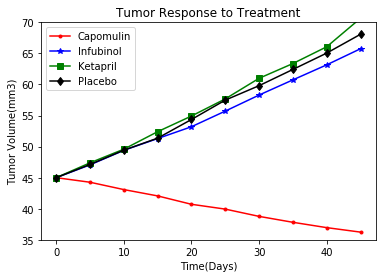

In [23]:
days = [0, 10, 20, 30, 40]
x_limit = 50
y_limit = 70
x = np.linspace(0,10,50)
plt.ylim(35,70, 5)
drug_campo, = plt.plot(a['Timepoint'],a["Capomulin"], marker=".", color="red", label="Capomulin")
drug_infu, = plt.plot(a['Timepoint'],a["Infubinol"], marker="*", color="blue", label="Infubinol")
drug_keta, = plt.plot(a['Timepoint'],a["Ketapril"], marker="s", color="Green", label="Ketapril")
drug_placebo, = plt.plot(a["Timepoint"],a["Placebo"], marker="d", color="black", label="Placebo")
#plt.plot(x,y,'-r')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")                   
plt.ylabel("Tumor Volume(mm3)")
plt.legend(loc="best")

plt.show()

In [24]:
print(f"Metastatic Response to Treatment")

Metastatic Response to Treatment


In [25]:
met_table = merged_data_df[["Drug", "Timepoint", "Metastatic Sites"]]
met_table.head(2)

,Drug,Timepoint,Metastatic Sites
0,Stelasyn,0,0
1,Stelasyn,5,0


In [28]:
grouped_met = met_table.groupby(["Drug", "Timepoint"])['Metastatic Sites']
mean_met = grouped_met.mean()
# reset.index
mean_met = mean_met.reset_index()
mean_met_df = pd.DataFrame(mean_met)
mean_met_df.head(2)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.16


In [29]:
met_sem = grouped_met.sem()
# to DataFrame
met_sem_df = pd.DataFrame(met_sem)
# Preveiw
met_sem_df.reset_index(inplace=True)
met_sem_df.head(2)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833


In [30]:
# Minor Data Munging
pivot_mean_met_df = mean_met_df.pivot(index='Timepoint',columns = 'Drug', values='Metastatic Sites')
# Preveiw
b=pivot_mean_met_df.reset_index()
b.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
1,5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


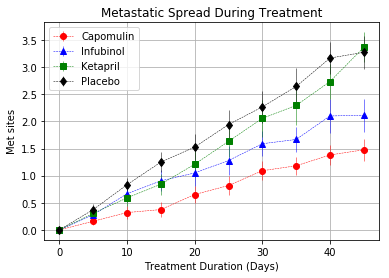

In [31]:
drug_list = [('Capomulin', 'o', 'red'), ('Infubinol', '^', 'blue'),('Ketapril', 's', 'green'),('Placebo', 'd', 'black')]
for drug,marker,colors in drug_list:
    ste = met_sem[drug]
    met_treatment_plt = plt.errorbar(pivot_mean_met_df.index,pivot_mean_met_df[drug],ste,
                                        fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met sites")
plt.grid()

In [32]:
print(f"Survival Rates")

Survival Rates


In [33]:
rate_table = merged_data_df[["Drug", "Timepoint", "Mouse ID"]]
rate_table.head(2)

,Drug,Timepoint,Mouse ID
0,Stelasyn,0,f234
1,Stelasyn,5,f234


In [34]:
grouped_mouse = rate_table.groupby(["Drug", "Timepoint"])["Mouse ID"]
# Counting
count_mouse = grouped_mouse.nunique()
# To DataFrame
count_mouse_df = pd.DataFrame(count_mouse)
# Index
count_mouse_df.reset_index(inplace=True)
# Rename
count_mouse_df = count_mouse_df.rename(columns={"Mouse ID":"Mouse numbers"})
count_mouse_df.head()

,Drug,Timepoint,Mouse numbers
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [35]:
# Miner Data Munging
pivot_count_mouse_df = count_mouse_df.pivot(index="Timepoint",columns="Drug",values="Mouse numbers")
# Preveiw
c=pivot_count_mouse_df.reset_index()
c.head(2)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,25,25,25,25
1,5,25,21,25,23,23,24,24,25,24,24


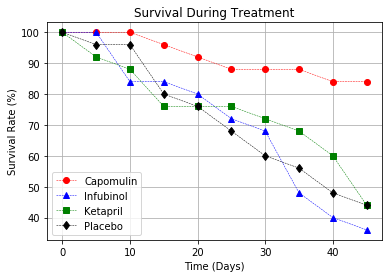

In [36]:
for drug,marker,colors in drug_list:
    total_mouse = pivot_count_mouse_df[drug][0]
    survival_rate = (pivot_count_mouse_df[drug]/total_mouse)*100
    survival_treatment = plt.plot(pivot_count_mouse_df.index,survival_rate,
                                      marker=marker,ls='--',color=colors,linewidth=0.5)
    
    
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

In [37]:
print(f"Summary Bar Graph")

Summary Bar Graph


In [38]:
# Calculation of change based on every drug
percentage_change = (pivot_mean_tumore_df.iloc[-1]/(pivot_mean_tumore_df.iloc[0])-1)*100
# Preveiw
percentage_change.head()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
dtype: float64

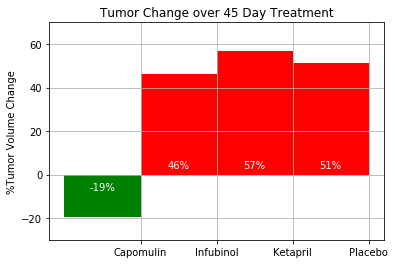

In [39]:
# Splice
passing = percentage_change < 0
# Widths. labels. tick mrks.
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[drug]) for drug in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('%Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Labeling the changes percentage
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                 '%d' % int(height)+'%',color='white',
                ha ='center', va ='bottom')
autolabel(change_plt)